# Syed

In [3]:
# Importing librarries

import numpy as np
import pandas as pd


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os

Google Colab

In [13]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')
#Change directory
os.chdir("/content/drive/MyDrive/Student")
# Read csv
df_assess = pd.read_csv("data/assessments.csv")
df_course = pd.read_csv("data/courses.csv")
df_stdnt_assess = pd.read_csv("data/studentAssessment.csv")
df_stdnt_info = pd.read_csv("data/studentInfo.csv")
df_stdnt_reg = pd.read_csv("data/studentRegistration.csv")
df_stdnt_vle = pd.read_csv("data/studentVle.csv")
df_vle = pd.read_csv("data/vle.csv")

Local Machine

In [ ]:
# folder name
input = "Data"
df_assess = pd.read_csv((input + "/assessments.csv"))
df_course = pd.read_csv((input + "/courses.csv"))
df_stdnt_assess = pd.read_csv((input + "/studentAssessment.csv"))
df_stdnt_info = pd.read_csv((input + "/studentInfo.csv"))
df_stdnt_reg = pd.read_csv((input + "/studentRegistration.csv"))
df_stdnt_vle = pd.read_csv((input + "/studentVle.csv"))
df_vle = pd.read_csv((input + "/vle.csv"))

In [14]:
print(df_vle.head())
print(df_vle.shape)

   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN
(6364, 6)


In [15]:
print(df_stdnt_vle.head())
print(df_stdnt_vle.shape)

  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1
(10655280, 6)


In [16]:
# Mergeing vle and studentvle files using inner join
vle_merge = pd.merge(df_vle, df_stdnt_vle, on=['code_module', 'code_presentation', 'id_site'], how='inner')

# Displaying merged data
vle_merge.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to,id_student,date,sum_click
0,546943,AAA,2013J,resource,NaN,NaN,75091,-10,1
1,546943,AAA,2013J,resource,NaN,NaN,186149,-10,1
2,546943,AAA,2013J,resource,NaN,NaN,205350,-10,2
3,546943,AAA,2013J,resource,NaN,NaN,1626710,-9,1
4,546943,AAA,2013J,resource,NaN,NaN,2643002,-8,1


In [17]:
vle_merge.shape

(10655280, 9)

In [18]:
# Mergeing student registration and course info files using inner join
reg_course_merge = pd.merge(df_stdnt_reg, df_course, on=['code_module', 'code_presentation'], how='inner')

# Displaying merged data
reg_course_merge.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,268
1,AAA,2013J,28400,-53.0,NaN,268
2,AAA,2013J,30268,-92.0,12.0,268
3,AAA,2013J,31604,-52.0,NaN,268
4,AAA,2013J,32885,-176.0,NaN,268


In [19]:
# Merging above merged file with student information
reg_course_Info_merge = pd.merge(reg_course_merge, df_stdnt_info, on=['code_module', 'code_presentation', 'id_student'], how='inner')

reg_course_Info_merge

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,-159.0,NaN,268,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,-53.0,NaN,268,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,-92.0,12.0,268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,268,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,-176.0,NaN,268,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,269,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,-23.0,NaN,269,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,-129.0,NaN,269,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,-49.0,101.0,269,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [20]:
reg_course_Info_merge.shape

(32593, 15)

In [21]:
col = [6,7, 8, 9, 10]
reg_course_Info_merge.drop(reg_course_Info_merge.columns[col], axis=1, inplace = True)

In [22]:
reg_course_Info_merge

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,-159.0,NaN,268,0,240,N,Pass
1,AAA,2013J,28400,-53.0,NaN,268,0,60,N,Pass
2,AAA,2013J,30268,-92.0,12.0,268,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,268,0,60,N,Pass
4,AAA,2013J,32885,-176.0,NaN,268,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,269,0,30,N,Fail
32589,GGG,2014J,2645731,-23.0,NaN,269,0,30,N,Distinction
32590,GGG,2014J,2648187,-129.0,NaN,269,0,30,Y,Pass
32591,GGG,2014J,2679821,-49.0,101.0,269,0,30,N,Withdrawn


Correlation

In [26]:
corelation = reg_course_Info_merge.corr()
corelation

,id_student,date_registration,date_unregistration,module_presentation_length,num_of_prev_attempts,studied_credits
id_student,1.000000,0.009904,0.009031,0.017360,0.011473,-0.003868
date_registration,0.009904,1.000000,0.253589,-0.021037,-0.025191,-0.090988
date_unregistration,0.009031,0.253589,1.000000,-0.014621,0.014519,-0.180316
module_presentation_length,0.017360,-0.021037,-0.014621,1.000000,-0.066306,-0.020596
num_of_prev_attempts,0.011473,-0.025191,0.014519,-0.066306,1.000000,0.181729
studied_credits,-0.003868,-0.090988,-0.180316,-0.020596,0.181729,1.000000


### Disability Analysis

In [23]:
dist = df_stdnt_info[['id_student','num_of_prev_attempts','final_result','disability' ]]
dist = dist.drop_duplicates('id_student', keep = 'last')

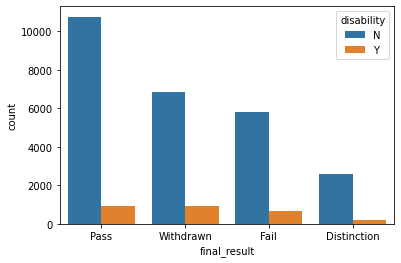

In [24]:
sns.countplot(x='final_result', hue='disability', data=dist)